In [165]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [166]:
def f0(x):
    return 1

def los0(x,alpha,beta,L):
    return (x**2)/2 + (beta - alpha - (L**2)/2)*x/L + alpha

In [167]:
def f1(x):
    return x

def los1(x,alpha,beta,L):
    return (x**3)/6 + (beta - alpha - (L**3)/6)*x/L + alpha

In [168]:
def f2(x): #Här skapar vi en testfunktion 
    return x**2

def los2(x,alpha,beta,L): #Här definierar vi den exakta lösningen till ovanstående testfunktion
    return (x**4)/12 + (beta - alpha - (L**4)/12)*x/L + alpha


In [169]:
def twopBVP(fvec, alpha, beta, L, N):
    deltaX = L/(N+1)
    T = np.eye(N)*(-2) 
    for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
        T[i+1,i] = 1
        T[i, i+1] = 1
    T = T/(deltaX**2)
    y = np.linalg.inv(T)@fvec
    y = np.insert(y, 0, alpha)
    y = np.append(y,beta)
    
    return  y #Detta löser ekvationen och spottar ut en vektor innehållande y(i). 

def fvecgen(f,alpha, beta, L, N): #Tanken är att denna ska generera högerledet som man sedan stoppar in i twopBVP för att lösa. 
    deltaX = L/(N+1)
    fvec = np.zeros((N,1))
    Xvec = np.linspace(deltaX,L-deltaX,N)
    for i in range(len(Xvec)):  #Fyller fvec med funktionsvärdena F(x1) till F(xN-1)
        fvec[i] = f(Xvec[i])
    fvec[0] = -alpha/(deltaX**2) + fvec[0] #Första och sista elementet i fvec fixar vi manuellt. 
    fvec[-1] = -beta/(deltaX**2) + fvec[-1]
    Xvec = np.insert(Xvec, 0, 0)
    Xvec = np.append(Xvec,L)
    return fvec, Xvec

    
    

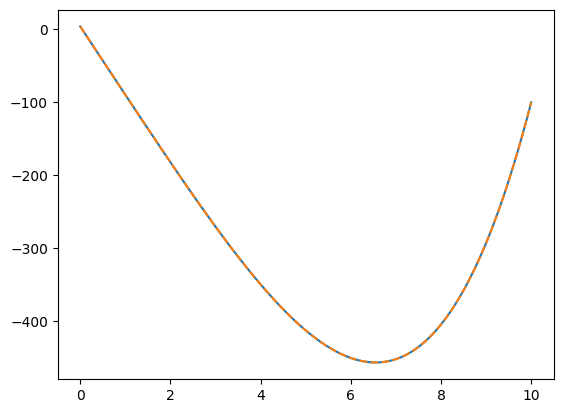

In [170]:
f = f2
alpha = 4
beta = -100
N = 100
L = 10
fvec, Xvec = fvecgen(f, alpha, beta, L, N)
y = twopBVP(fvec, alpha, beta, L, N)

plt.plot(Xvec, y)
plt.plot(Xvec, los2(Xvec,alpha,beta,L), '--')


[1.5241579027587207, 0.45231472058244176, 0.1236732182553793, 0.032367369641833885, 0.00828148734487963, 0.0020946337636155, 0.0005267267795165703, 0.0001320675233595771, 3.3064870639135955e-05, 8.273291844773737e-06]


Text(0.5, 1.0, 'Proving that the error is O(h^2)')

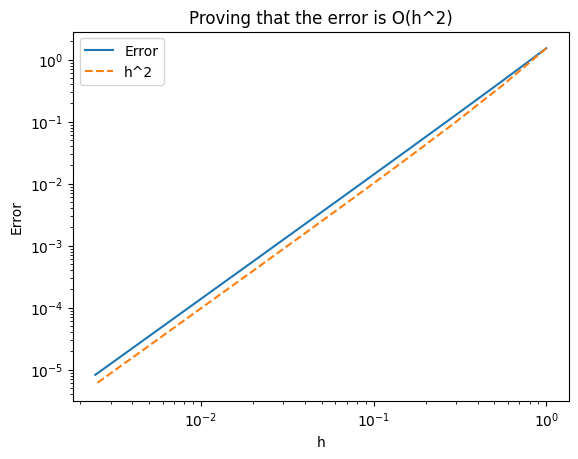

In [171]:
f = f2
Nvec = np.linspace(3,12,10).astype(int)
Nvec = 2**Nvec
errorvec = []
hvec = []
for N in Nvec:
    fvec, Xvec = fvecgen(f, alpha, beta, L, N)
    y = twopBVP(fvec, alpha, beta, L, N)
    errorvec.append(np.mean(y - los2(Xvec,alpha,beta,L)))
    hvec.append(L/(N+2))

plt.figure()
print(errorvec)
plt.loglog(hvec, errorvec)
plt.plot(hvec, errorvec[0]*Nvec[0]**2*1/Nvec**2, '--')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['Our error', 'h^2'])
plt.title('Proving that the error is O(h^2)')


In [188]:
def I(x):
    return 1e-3*(3-2*np.cos(np.pi*x/L)**12)
def q(x):
    return -50000


Värdet i mittpunkten är: -0.011741031673595012


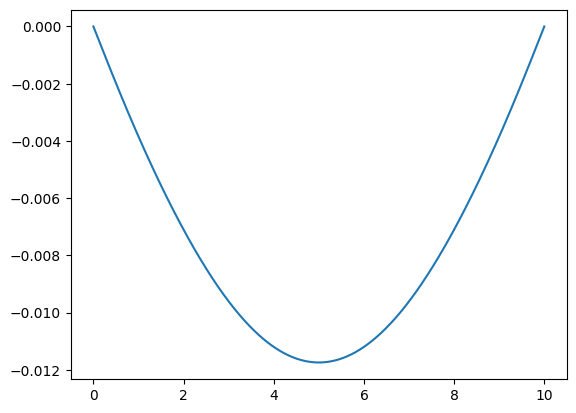

In [192]:
E = 1.9e+11
N = 999
L = 10
alpha = 0
beta = 0
qvec, Xvec = fvecgen(q, alpha, beta, L, N)
Mvec = twopBVP(qvec, alpha, beta, L, N)
MEIvec = np.zeros((len(qvec),1))
for i in range(len(MEIvec)):
    MEIvec[i] = Mvec[i+1]/(E*I(Xvec[i+1]))
u = twopBVP(MEIvec, alpha, beta, L, N)
plt.figure()
plt.plot(Xvec, u)
print('Värdet i mittpunkten är: '+ str((u[500]+u[501])/2))

